In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr


# Load Data

In [2]:
df = pd.read_csv('/Users/ImritM/Downloads/2024_u24_db_males_fall_camp.csv')
df['Paddle Side'] = df['Paddle Side'].replace({'Paddler Left': 'left', 'Paddler Right': 'right'})
df.drop(columns = df.columns[df.columns.str.contains('start|finish', case=False)], inplace = True)

df.columns = ['dob', 'name', 'gender', 'weight', 'paddle_side', 'oc_330', 'oc_150', '2min_perg']
df.sort_values(by = ['paddle_side', 'oc_330'], inplace = True)

df.drop(columns = ['dob', 'name'], inplace = True) #Don't want some people to be identified whoops

df['oc_330'] = pd.to_timedelta(df['oc_330'].astype(str).apply(lambda x: '0:' + x))
df['oc_150'] = pd.to_timedelta(df['oc_150'].astype(str).apply(lambda x: '0:' + x))

df['oc_330_sec'] = df['oc_330'].dt.total_seconds()
df['oc_150_sec'] = df['oc_150'].dt.total_seconds()

display(df.head())

,gender,weight,paddle_side,oc_330,oc_150,2min_perg,oc_330_sec,oc_150_sec
0,Male,191.8,left,0 days 00:01:45.200000,0 days 00:00:43.900000,474.3,105.2,43.9
1,male,181.2,left,0 days 00:01:45.600000,0 days 00:00:45.800000,508.3,105.6,45.8
2,Male,189.6,left,0 days 00:01:49.400000,0 days 00:00:43,469.0,109.4,43.0
3,Male,170.2,left,0 days 00:01:49.800000,0 days 00:00:46.800000,465.1,109.8,46.8
4,Male,188.2,left,0 days 00:01:52.600000,0 days 00:00:48.400000,500.1,112.6,48.4


# Some Numbers

In [3]:
print(f'''We have:
- {df['paddle_side'].value_counts()['left']} left side guys 
- {df['paddle_side'].value_counts()['right']} right side guys''')
print('-------------------------')

print('For the left sides, the average are:')
print(df.loc[df['paddle_side'] == 'left'][['weight', 'oc_330', 'oc_150', '2min_perg']].mean())
print('-------------------------')

print('For the right sides, the average are:')
print(df.loc[df['paddle_side'] == 'right'][['weight', 'oc_330', 'oc_150', '2min_perg']].mean())

We have:
- 31 left side guys 
- 26 right side guys
-------------------------
For the left sides, the average are:
weight                      177.264516
oc_330       0 days 00:02:00.290322580
oc_150       0 days 00:00:49.406451612
2min_perg                   452.873333
dtype: object
-------------------------
For the right sides, the average are:
weight                      178.846154
oc_330       0 days 00:02:02.576923076
oc_150       0 days 00:00:50.369230769
2min_perg                       451.12
dtype: object


## Correlations

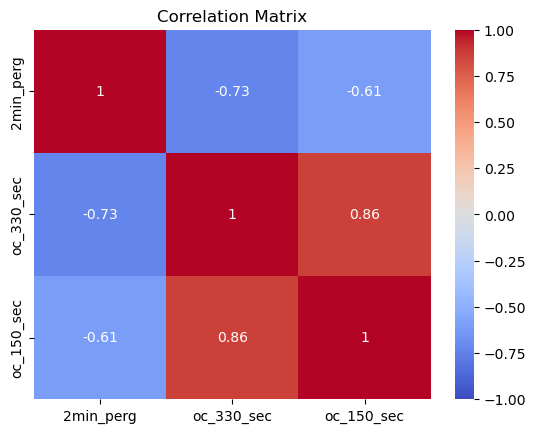

In [4]:
corr = df[['2min_perg', 'oc_330_sec', 'oc_150_sec']].corr()

# plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

#### Quick check to see if correlations are significant

In [5]:
pvalues = (df[['2min_perg', 'oc_330_sec', 'oc_150_sec']]
           .corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(df[['2min_perg', 'oc_330_sec', 'oc_150_sec']].columns))) 
pvalues

,2min_perg,oc_330_sec,oc_150_sec
2min_perg,0.000000e+00,2.758244e-10,9.889618e-07
oc_330_sec,2.758244e-10,0.000000e+00,4.795945e-18
oc_150_sec,9.889618e-07,4.795945e-18,0.000000e+00


As expected OC correlations are highest and there is indeed a correlation between the perg distance and OC, in that higher perg scores tend to have lower (better) OC times.

# To make team canada

Paddlers will realistically need to be Top 12 on their side if they want to make team Canada. Given the current data and the 12th best person, paddlers will have to reach these milestones or get better scores than below if they want to make team Canada.\

Below are the times/distance paddlers should beat to have a chance of making Team Canada

###### For left side

In [6]:
display(df.loc[df['paddle_side'] == 'left'].iloc[11][['oc_330', 'oc_150', '2min_perg']])

oc_330              0 days 00:01:56
oc_150       0 days 00:00:47.100000
2min_perg                     485.0
Name: 11, dtype: object

##### For right side

In [7]:
display(df.loc[df['paddle_side'] == 'right'].iloc[11][['oc_330', 'oc_150', '2min_perg']])

oc_330       0 days 00:01:59.400000
oc_150       0 days 00:00:48.100000
2min_perg                     416.1
Name: 42, dtype: object